In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("data/archive-Toddler/Toddler Autism dataset July 2018.csv")
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
data = data.applymap(lambda x: np.nan if x == '?' else x)

In [5]:
data = data.dropna()

In [6]:
del data['Case_No']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1053
Data columns (total 18 columns):
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64(12), object(6)
memory usage: 156.5+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

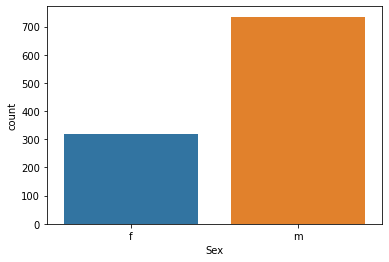

In [9]:
sns.countplot(x=data['Sex'])

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

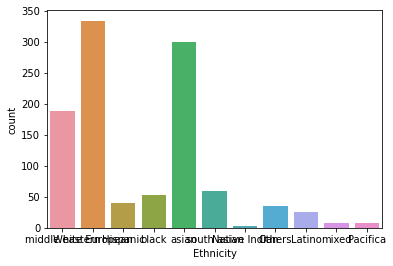

In [10]:
sns.countplot(x=data['Ethnicity'])

In [11]:
data['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Jaundice', ylabel='count'>

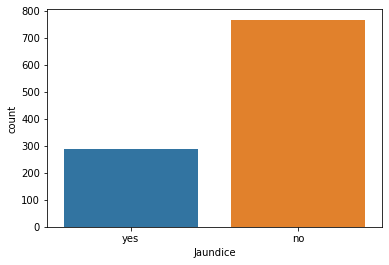

In [12]:
sns.countplot(x=data['Jaundice'])

<AxesSubplot:xlabel='Family_mem_with_ASD', ylabel='count'>

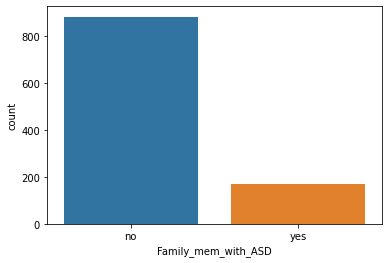

In [13]:
sns.countplot(x=data['Family_mem_with_ASD'])

<AxesSubplot:xlabel='Who completed the test', ylabel='count'>

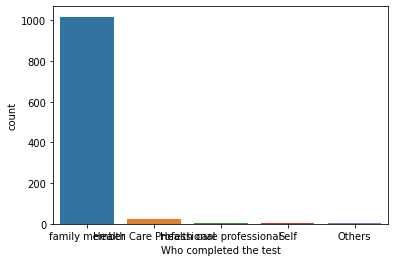

In [15]:
sns.countplot(x=data['Who completed the test'])

In [16]:
data['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

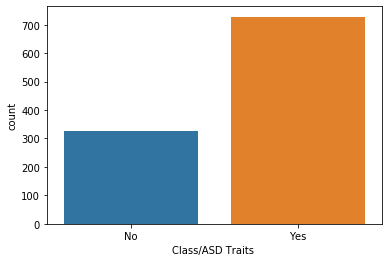

In [7]:
sns.countplot(x=data['Class/ASD Traits '])

In [8]:
data.to_csv('toddler_processed.csv')

In [8]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Ethnicity']= label_encoder.fit_transform(data['Ethnicity'])
data['Jaundice']= label_encoder.fit_transform(data['Jaundice'])
data['Family_mem_with_ASD']= label_encoder.fit_transform(data['Family_mem_with_ASD'])
data['Who completed the test']= label_encoder.fit_transform(data['Who completed the test'])
data['Class/ASD Traits ']= label_encoder.fit_transform(data['Class/ASD Traits '])


data['Sex'].unique()
data['Ethnicity'].unique()
data['Jaundice'].unique()
data['Family_mem_with_ASD'].unique()
data['Who completed the test'].unique()
data['Class/ASD Traits '].unique()


array([0, 1], dtype=int64)

In [9]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1


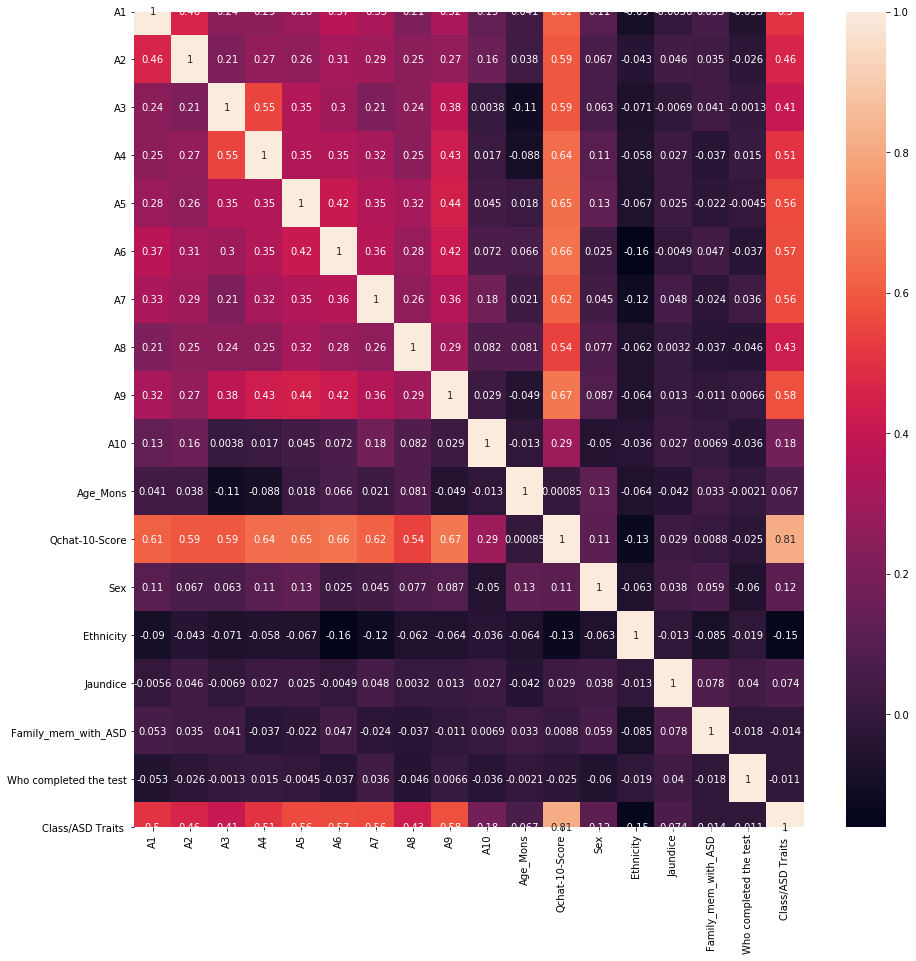

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
X = data.drop(["Class/ASD Traits "],axis =1)
y = data["Class/ASD Traits "]

# Quantile Transformer

In [12]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_new = qt.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((843, 17), (843,), (211, 17), (211,))

In [14]:
from sklearn.metrics import log_loss, roc_auc_score, matthews_corrcoef, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score

In [15]:
ML_Model = []
accuracy = []
roc = []
precision = []
recall = []
f1_scorea = []
mcc = []
kappa = []
loga = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    roc.append(round(b, 3))
    precision.append(round(c, 3))
    recall.append(round(d, 3))
    f1_scorea.append(round(e,3))
    mcc.append(round(f,3))
    kappa.append(round(g,3))
    loga.append(round(h,3))


In [16]:
ML_Model1 = []
accuracy1 = []
roc1 = []
precision1 = []
recall1 = []
f1_score1 = []
mcc1 = []
kappa1 = []
log1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f,g,h):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    roc1.append(round(b, 3))
    precision1.append(round(c, 3))
    recall1.append(round(d, 3))
    f1_score1.append(round(e,3))
    mcc1.append(round(f,3))
    kappa1.append(round(g,3))
    log1.append(round(h,3))


In [17]:
ML_Model2 = []
accuracy2 = []
roc2 = []
precision2 = []
recall2 = []
f1_score2 = []
mcc2 = []
kappa2 = []
log2 = []

#function to call for storing the results
def storeResults2(model, a,b,c,d,e,f,g,h):
    ML_Model2.append(model)
    accuracy2.append(round(a, 3))
    roc2.append(round(b, 3))
    precision2.append(round(c, 3))
    recall2.append(round(d, 3))
    f1_score2.append(round(e,3))
    mcc2.append(round(f,3))
    kappa2.append(round(g,3))
    log2.append(round(h,3))


In [18]:
ML_Model3 = []
accuracy3 = []
roc3 = []
precision3 = []
recall3 = []
f1_score3 = []
mcc3 = []
kappa3 = []
log3 = []

#function to call for storing the results
def storeResults3(model, a,b,c,d,e,f,g,h):
    ML_Model3.append(model)
    accuracy3.append(round(a, 3))
    roc3.append(round(b, 3))
    precision3.append(round(c, 3))
    recall3.append(round(d, 3))
    f1_score3.append(round(e,3))
    mcc3.append(round(f,3))
    kappa3.append(round(g,3))
    log3.append(round(h,3))


# AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_a = accuracy_score(y_pred, y_test)
ab_roc_a = roc_auc_score(y_pred, y_test)
ab_prec_a = precision_score(y_pred, y_test)
ab_rec_a = recall_score(y_pred, y_test)
ab_f1_a = f1_score(y_pred, y_test)
ab_mcc_a = matthews_corrcoef(y_pred, y_test)
ab_kap_a = cohen_kappa_score(y_pred, y_test)
ab_log_a = log_loss(y_pred, y_test)

In [20]:
storeResults('AdaBoost Classifier',ab_acc_a,ab_roc_a,ab_prec_a,ab_rec_a,ab_f1_a,ab_mcc_a,ab_kap_a,ab_log_a)

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_a = accuracy_score(y_pred, y_test)
rf_roc_a = roc_auc_score(y_pred, y_test)
rf_prec_a = precision_score(y_pred, y_test)
rf_rec_a = recall_score(y_pred, y_test)
rf_f1_a = f1_score(y_pred, y_test)
rf_mcc_a = matthews_corrcoef(y_pred, y_test)
rf_kap_a = cohen_kappa_score(y_pred, y_test)
rf_log_a = log_loss(y_pred, y_test)

In [22]:
storeResults('Ransom Forest Classifier',rf_acc_a,rf_roc_a,rf_prec_a,rf_rec_a,rf_f1_a,rf_mcc_a,rf_kap_a,rf_log_a)

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_a = accuracy_score(y_pred, y_test)
dt_roc_a = roc_auc_score(y_pred, y_test)
dt_prec_a = precision_score(y_pred, y_test)
dt_rec_a = recall_score(y_pred, y_test)
dt_f1_a = f1_score(y_pred, y_test)
dt_mcc_a = matthews_corrcoef(y_pred, y_test)
dt_kap_a = cohen_kappa_score(y_pred, y_test)
dt_log_a = log_loss(y_pred, y_test)

In [24]:
storeResults('Decision Tree Classifier',dt_acc_a,dt_roc_a,dt_prec_a,dt_rec_a,dt_f1_a,dt_mcc_a,dt_kap_a,dt_log_a)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_a = accuracy_score(y_pred, y_test)
knn_roc_a = roc_auc_score(y_pred, y_test)
knn_prec_a = precision_score(y_pred, y_test)
knn_rec_a = recall_score(y_pred, y_test)
knn_f1_a = f1_score(y_pred, y_test)
knn_mcc_a = matthews_corrcoef(y_pred, y_test)
knn_kap_a = cohen_kappa_score(y_pred, y_test)
knn_log_a = log_loss(y_pred, y_test)

In [26]:
storeResults('KNN',knn_acc_a,knn_roc_a,knn_prec_a,knn_rec_a,knn_f1_a,knn_mcc_a,knn_kap_a,knn_log_a)

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_a = accuracy_score(y_pred, y_test)
nb_roc_a = roc_auc_score(y_pred, y_test)
nb_prec_a = precision_score(y_pred, y_test)
nb_rec_a = recall_score(y_pred, y_test)
nb_f1_a = f1_score(y_pred, y_test)
nb_mcc_a = matthews_corrcoef(y_pred, y_test)
nb_kap_a = cohen_kappa_score(y_pred, y_test)
nb_log_a = log_loss(y_pred, y_test)

In [28]:
storeResults('Naive Bayes',nb_acc_a,nb_roc_a,nb_prec_a,nb_rec_a,nb_f1_a,nb_mcc_a,nb_kap_a,nb_log_a)

# Logistic Regression

In [29]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_a = accuracy_score(y_pred, y_test)
lr_roc_a = roc_auc_score(y_pred, y_test)
lr_prec_a = precision_score(y_pred, y_test)
lr_rec_a = recall_score(y_pred, y_test)
lr_f1_a = f1_score(y_pred, y_test)
lr_mcc_a = matthews_corrcoef(y_pred, y_test)
lr_kap_a = cohen_kappa_score(y_pred, y_test)
lr_log_a = log_loss(y_pred, y_test)

In [30]:
storeResults('Logistic Regression',lr_acc_a,lr_roc_a,lr_prec_a,lr_rec_a,lr_f1_a,lr_mcc_a,lr_kap_a,lr_log_a)

# SVM

In [31]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_a = accuracy_score(y_pred, y_test)
svc_roc_a = roc_auc_score(y_pred, y_test)
svc_prec_a = precision_score(y_pred, y_test)
svc_rec_a = recall_score(y_pred, y_test)
svc_f1_a = f1_score(y_pred, y_test)
svc_mcc_a = matthews_corrcoef(y_pred, y_test)
svc_kap_a = cohen_kappa_score(y_pred, y_test)
svc_log_a = log_loss(y_pred, y_test)

In [32]:
storeResults('SVC',svc_acc_a,svc_roc_a,svc_prec_a,svc_rec_a,svc_f1_a,svc_mcc_a,svc_kap_a,svc_log_a)

# LDA

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_a = accuracy_score(y_pred, y_test)
lda_roc_a = roc_auc_score(y_pred, y_test)
lda_prec_a = precision_score(y_pred, y_test)
lda_rec_a = recall_score(y_pred, y_test)
lda_f1_a = f1_score(y_pred, y_test)
lda_mcc_a = matthews_corrcoef(y_pred, y_test)
lda_kap_a = cohen_kappa_score(y_pred, y_test)
lda_log_a = log_loss(y_pred, y_test)

In [34]:
storeResults('LDA',lda_acc_a,lda_roc_a,lda_prec_a,lda_rec_a,lda_f1_a,lda_mcc_a,lda_kap_a,lda_log_a)

# Voting Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = DecisionTreeClassifier(max_depth=30)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_a = accuracy_score(y_pred, y_test)
vot_roc_a = roc_auc_score(y_pred, y_test)
vot_prec_a = precision_score(y_pred, y_test)
vot_rec_a = recall_score(y_pred, y_test)
vot_f1_a = f1_score(y_pred, y_test)
vot_mcc_a = matthews_corrcoef(y_pred, y_test)
vot_kap_a = cohen_kappa_score(y_pred, y_test)
vot_log_a = log_loss(y_pred, y_test)


storeResults('Voting Classifier',vot_acc_a,vot_roc_a,vot_prec_a,vot_rec_a,vot_f1_a,vot_mcc_a,vot_kap_a,vot_log_a)

# Comparison

In [36]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'ROC score' : roc,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1_scorea,
                        'MCC' : mcc,
                        'Kappa Score' : kappa,
                       'Log Loss' : loga
                      })

In [37]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
1,Ransom Forest Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
2,Decision Tree Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
3,KNN,0.934,0.917,0.923,0.978,0.949,0.857,0.854,2.292
4,Naive Bayes,0.972,0.962,0.965,0.993,0.979,0.937,0.936,0.982
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVC,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
7,LDA,0.962,0.973,1.000,0.947,0.973,0.915,0.911,1.310
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [38]:
import joblib
filename = 'Model/model_toddler_qt.sav'
joblib.dump(rf, filename)

['Model/model_toddler_qt.sav']

# Power Transformer

In [39]:
X = data.drop(["Class/ASD Traits "],axis =1)
y = data["Class/ASD Traits "]

In [40]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [41]:
X_new = pt.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((843, 17), (843,), (211, 17), (211,))

# AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_b = accuracy_score(y_pred, y_test)
ab_roc_b = roc_auc_score(y_pred, y_test)
ab_prec_b = precision_score(y_pred, y_test)
ab_rec_b = recall_score(y_pred, y_test)
ab_f1_b = f1_score(y_pred, y_test)
ab_mcc_b = matthews_corrcoef(y_pred, y_test)
ab_kap_b = cohen_kappa_score(y_pred, y_test)
ab_log_b = log_loss(y_pred, y_test)

In [44]:
storeResults1('AdaBoost',ab_acc_b,ab_roc_b,ab_prec_b,ab_rec_b,ab_f1_b,ab_mcc_b,ab_kap_b,ab_log_b)

# Random FOrest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_b = accuracy_score(y_pred, y_test)
rf_roc_b = roc_auc_score(y_pred, y_test)
rf_prec_b = precision_score(y_pred, y_test)
rf_rec_b = recall_score(y_pred, y_test)
rf_f1_b = f1_score(y_pred, y_test)
rf_mcc_b = matthews_corrcoef(y_pred, y_test)
rf_kap_b = cohen_kappa_score(y_pred, y_test)
rf_log_b = log_loss(y_pred, y_test)

In [46]:
storeResults1('Random Forest',rf_acc_b,rf_roc_b,rf_prec_b,rf_rec_b,rf_f1_b,rf_mcc_b,rf_kap_b,rf_log_b)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_b = accuracy_score(y_pred, y_test)
dt_roc_b = roc_auc_score(y_pred, y_test)
dt_prec_b = precision_score(y_pred, y_test)
dt_rec_b = recall_score(y_pred, y_test)
dt_f1_b = f1_score(y_pred, y_test)
dt_mcc_b = matthews_corrcoef(y_pred, y_test)
dt_kap_b = cohen_kappa_score(y_pred, y_test)
dt_log_b = log_loss(y_pred, y_test)

In [48]:
storeResults1('Decision Tree',dt_acc_b,dt_roc_b,dt_prec_b,dt_rec_b,dt_f1_b,dt_mcc_b,dt_kap_b,dt_log_b)

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_b = accuracy_score(y_pred, y_test)
knn_roc_b = roc_auc_score(y_pred, y_test)
knn_prec_b = precision_score(y_pred, y_test)
knn_rec_b = recall_score(y_pred, y_test)
knn_f1_b = f1_score(y_pred, y_test)
knn_mcc_b = matthews_corrcoef(y_pred, y_test)
knn_kap_b = cohen_kappa_score(y_pred, y_test)
knn_log_b = log_loss(y_pred, y_test)

In [50]:
storeResults1('KNN',knn_acc_b,knn_roc_b,knn_prec_b,knn_rec_b,knn_f1_b,knn_mcc_b,knn_kap_b,knn_log_b)

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_b = accuracy_score(y_pred, y_test)
nb_roc_b = roc_auc_score(y_pred, y_test)
nb_prec_b = precision_score(y_pred, y_test)
nb_rec_b = recall_score(y_pred, y_test)
nb_f1_b = f1_score(y_pred, y_test)
nb_mcc_b = matthews_corrcoef(y_pred, y_test)
nb_kap_b = cohen_kappa_score(y_pred, y_test)
nb_log_b = log_loss(y_pred, y_test)

In [52]:
storeResults1('Naive Bayes',nb_acc_b,nb_roc_b,nb_prec_b,nb_rec_b,nb_f1_b,nb_mcc_b,nb_kap_b,nb_log_b)

# Logistic Regession

In [53]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_b = accuracy_score(y_pred, y_test)
lr_roc_b = roc_auc_score(y_pred, y_test)
lr_prec_b = precision_score(y_pred, y_test)
lr_rec_b = recall_score(y_pred, y_test)
lr_f1_b = f1_score(y_pred, y_test)
lr_mcc_b = matthews_corrcoef(y_pred, y_test)
lr_kap_b = cohen_kappa_score(y_pred, y_test)
lr_log_b = log_loss(y_pred, y_test)

In [54]:
storeResults1('Logistic Regression',lr_acc_b,lr_roc_b,lr_prec_b,lr_rec_b,lr_f1_b,lr_mcc_b,lr_kap_b,lr_log_b)

# SVM

In [55]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_b = accuracy_score(y_pred, y_test)
svc_roc_b = roc_auc_score(y_pred, y_test)
svc_prec_b = precision_score(y_pred, y_test)
svc_rec_b = recall_score(y_pred, y_test)
svc_f1_b = f1_score(y_pred, y_test)
svc_mcc_b = matthews_corrcoef(y_pred, y_test)
svc_kap_b = cohen_kappa_score(y_pred, y_test)
svc_log_b = log_loss(y_pred, y_test)

In [56]:
storeResults1('SVM',svc_acc_b,svc_roc_b,svc_prec_b,svc_rec_b,svc_f1_b,svc_mcc_b,svc_kap_b,svc_log_b)

# LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_b = accuracy_score(y_pred, y_test)
lda_roc_b = roc_auc_score(y_pred, y_test)
lda_prec_b = precision_score(y_pred, y_test)
lda_rec_b = recall_score(y_pred, y_test)
lda_f1_b = f1_score(y_pred, y_test)
lda_mcc_b = matthews_corrcoef(y_pred, y_test)
lda_kap_b = cohen_kappa_score(y_pred, y_test)
lda_log_b = log_loss(y_pred, y_test)

In [58]:
storeResults1('LDA',lda_acc_b,lda_roc_b,lda_prec_b,lda_rec_b,lda_f1_b,lda_mcc_b,lda_kap_b,lda_log_b)

# Voting Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = DecisionTreeClassifier(max_depth=30)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_b = accuracy_score(y_pred, y_test)
vot_roc_b = roc_auc_score(y_pred, y_test)
vot_prec_b = precision_score(y_pred, y_test)
vot_rec_b = recall_score(y_pred, y_test)
vot_f1_b = f1_score(y_pred, y_test)
vot_mcc_b = matthews_corrcoef(y_pred, y_test)
vot_kap_b = cohen_kappa_score(y_pred, y_test)
vot_log_b = log_loss(y_pred, y_test)


storeResults1('Voting Classifier',vot_acc_b,vot_roc_b,vot_prec_b,vot_rec_b,vot_f1_b,vot_mcc_b,vot_kap_b,vot_log_b)

In [60]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'ROC score' : roc1,
                        'Precision': precision1,
                        'Recall'   : recall1,
                        'F1-Score': f1_score1,
                        'MCC' : mcc1,
                        'Kappa Score' : kappa1,
                       'Log Loss' : log1
                      })

In [61]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
1,Random Forest,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
2,Decision Tree,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
3,KNN,0.972,0.965,0.972,0.986,0.979,0.936,0.936,0.982
4,Naive Bayes,0.967,0.956,0.958,0.993,0.975,0.927,0.926,1.146
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVM,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
7,LDA,0.986,0.990,1.000,0.979,0.990,0.968,0.967,0.491
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [62]:
import joblib
filename = 'Model/model_toddler_pt.sav'
joblib.dump(rf, filename)

['Model/model_toddler_pt.sav']

# MaxAbsScaler - MAS

In [63]:
X = data.drop(["Class/ASD Traits "],axis =1)
y = data["Class/ASD Traits "]

In [64]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler()
X_new = transformer.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((843, 17), (843,), (211, 17), (211,))

# AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_c = accuracy_score(y_pred, y_test)
ab_roc_c = roc_auc_score(y_pred, y_test)
ab_prec_c = precision_score(y_pred, y_test)
ab_rec_c = recall_score(y_pred, y_test)
ab_f1_c = f1_score(y_pred, y_test)
ab_mcc_c = matthews_corrcoef(y_pred, y_test)
ab_kap_c = cohen_kappa_score(y_pred, y_test)
ab_log_c = log_loss(y_pred, y_test)

In [67]:
storeResults2('AdaBoost',ab_acc_c,ab_roc_c,ab_prec_c,ab_rec_c,ab_f1_c,ab_mcc_c,ab_kap_c,ab_log_c)

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_c = accuracy_score(y_pred, y_test)
rf_roc_c = roc_auc_score(y_pred, y_test)
rf_prec_c = precision_score(y_pred, y_test)
rf_rec_c = recall_score(y_pred, y_test)
rf_f1_c = f1_score(y_pred, y_test)
rf_mcc_c = matthews_corrcoef(y_pred, y_test)
rf_kap_c = cohen_kappa_score(y_pred, y_test)
rf_log_c = log_loss(y_pred, y_test)

In [69]:
storeResults2('Random FOrest',rf_acc_c,rf_roc_c,rf_prec_c,rf_rec_c,rf_f1_c,rf_mcc_c,rf_kap_c,rf_log_c)

# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_c = accuracy_score(y_pred, y_test)
dt_roc_c = roc_auc_score(y_pred, y_test)
dt_prec_c = precision_score(y_pred, y_test)
dt_rec_c = recall_score(y_pred, y_test)
dt_f1_c = f1_score(y_pred, y_test)
dt_mcc_c = matthews_corrcoef(y_pred, y_test)
dt_kap_c = cohen_kappa_score(y_pred, y_test)
dt_log_c = log_loss(y_pred, y_test)

In [71]:
storeResults2('Decision Tree',dt_acc_c,dt_roc_c,dt_prec_c,dt_rec_c,dt_f1_c,dt_mcc_c,dt_kap_c,dt_log_c)

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_c = accuracy_score(y_pred, y_test)
knn_roc_c = roc_auc_score(y_pred, y_test)
knn_prec_c = precision_score(y_pred, y_test)
knn_rec_c = recall_score(y_pred, y_test)
knn_f1_c = f1_score(y_pred, y_test)
knn_mcc_c = matthews_corrcoef(y_pred, y_test)
knn_kap_c = cohen_kappa_score(y_pred, y_test)
knn_log_c = log_loss(y_pred, y_test)

In [73]:
storeResults2('KNN',knn_acc_c,knn_roc_c,knn_prec_c,knn_rec_c,knn_f1_c,knn_mcc_c,knn_kap_c,knn_log_c)

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_c = accuracy_score(y_pred, y_test)
nb_roc_c = roc_auc_score(y_pred, y_test)
nb_prec_c = precision_score(y_pred, y_test)
nb_rec_c = recall_score(y_pred, y_test)
nb_f1_c = f1_score(y_pred, y_test)
nb_mcc_c = matthews_corrcoef(y_pred, y_test)
nb_kap_c = cohen_kappa_score(y_pred, y_test)
nb_log_c = log_loss(y_pred, y_test)

In [75]:
storeResults2('Naive Bayes',nb_acc_c,nb_roc_c,nb_prec_c,nb_rec_c,nb_f1_c,nb_mcc_c,nb_kap_c,nb_log_c)

# Logistic Regression

In [76]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_c = accuracy_score(y_pred, y_test)
lr_roc_c = roc_auc_score(y_pred, y_test)
lr_prec_c = precision_score(y_pred, y_test)
lr_rec_c = recall_score(y_pred, y_test)
lr_f1_c = f1_score(y_pred, y_test)
lr_mcc_c = matthews_corrcoef(y_pred, y_test)
lr_kap_c = cohen_kappa_score(y_pred, y_test)
lr_log_c = log_loss(y_pred, y_test)

In [77]:
storeResults2('Logistic Regression',lr_acc_c,lr_roc_c,lr_prec_c,lr_rec_c,lr_f1_c,lr_mcc_c,lr_kap_c,lr_log_c)

# SVC

In [78]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_c = accuracy_score(y_pred, y_test)
svc_roc_c = roc_auc_score(y_pred, y_test)
svc_prec_c = precision_score(y_pred, y_test)
svc_rec_c = recall_score(y_pred, y_test)
svc_f1_c = f1_score(y_pred, y_test)
svc_mcc_c = matthews_corrcoef(y_pred, y_test)
svc_kap_c = cohen_kappa_score(y_pred, y_test)
svc_log_c = log_loss(y_pred, y_test)

In [79]:
storeResults2('SVC',svc_acc_c,svc_roc_c,svc_prec_c,svc_rec_c,svc_f1_c,svc_mcc_c,svc_kap_c,svc_log_c)

# LDA

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_c = accuracy_score(y_pred, y_test)
lda_roc_c = roc_auc_score(y_pred, y_test)
lda_prec_c = precision_score(y_pred, y_test)
lda_rec_c = recall_score(y_pred, y_test)
lda_f1_c = f1_score(y_pred, y_test)
lda_mcc_c = matthews_corrcoef(y_pred, y_test)
lda_kap_c = cohen_kappa_score(y_pred, y_test)
lda_log_c = log_loss(y_pred, y_test)

In [81]:
storeResults2('LDA',lda_acc_c,lda_roc_c,lda_prec_c,lda_rec_c,lda_f1_c,lda_mcc_c,lda_kap_c,lda_log_c)

# Voting Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = DecisionTreeClassifier(max_depth=30)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_c = accuracy_score(y_pred, y_test)
vot_roc_c = roc_auc_score(y_pred, y_test)
vot_prec_c = precision_score(y_pred, y_test)
vot_rec_c = recall_score(y_pred, y_test)
vot_f1_c = f1_score(y_pred, y_test)
vot_mcc_c = matthews_corrcoef(y_pred, y_test)
vot_kap_c = cohen_kappa_score(y_pred, y_test)
vot_log_c = log_loss(y_pred, y_test)


storeResults2('Voting Classifier',vot_acc_c,vot_roc_c,vot_prec_c,vot_rec_c,vot_f1_c,vot_mcc_c,vot_kap_c,vot_log_c)

In [83]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model2,
                        'Accuracy' : accuracy2,
                        'ROC score' : roc2,
                        'Precision': precision2,
                        'Recall'   : recall2,
                        'F1-Score': f1_score2,
                        'MCC' : mcc2,
                        'Kappa Score' : kappa2,
                       'Log Loss' : log2
                      })

In [84]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
1,Random FOrest,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
2,Decision Tree,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
3,KNN,0.953,0.941,0.951,0.978,0.964,0.895,0.894,1.637
4,Naive Bayes,0.972,0.962,0.965,0.993,0.979,0.937,0.936,0.982
5,Logistic Regression,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000
6,SVC,0.995,0.997,1.000,0.993,0.996,0.989,0.989,0.164
7,LDA,0.972,0.960,0.958,1.000,0.978,0.939,0.937,0.982
8,Voting Classifier,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000


In [85]:
import joblib
filename = 'Model/model_toddler_mas.sav'
joblib.dump(rf, filename)

['Model/model_toddler_mas.sav']

# Normalizer

In [86]:
X = data.drop(["Class/ASD Traits "],axis =1)
y = data["Class/ASD Traits "]

In [87]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_new = transformer.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((843, 17), (843,), (211, 17), (211,))

# AdaBoost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)
y_prob = ab.predict_proba(X_test)

ab_acc_d = accuracy_score(y_pred, y_test)
ab_roc_d = roc_auc_score(y_pred, y_test)
ab_prec_d = precision_score(y_pred, y_test)
ab_rec_d = recall_score(y_pred, y_test)
ab_f1_d = f1_score(y_pred, y_test)
ab_mcc_d = matthews_corrcoef(y_pred, y_test)
ab_kap_d = cohen_kappa_score(y_pred, y_test)
ab_log_d = log_loss(y_pred, y_test)

In [90]:
storeResults3('AdaBoost',ab_acc_d,ab_roc_d,ab_prec_d,ab_rec_d,ab_f1_d,ab_mcc_d,ab_kap_d,ab_log_d)

# Random FOrest

In [91]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model 
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)

rf_acc_d = accuracy_score(y_pred, y_test)
rf_roc_d = roc_auc_score(y_pred, y_test)
rf_prec_d = precision_score(y_pred, y_test)
rf_rec_d = recall_score(y_pred, y_test)
rf_f1_d = f1_score(y_pred, y_test)
rf_mcc_d = matthews_corrcoef(y_pred, y_test)
rf_kap_d = cohen_kappa_score(y_pred, y_test)
rf_log_d = log_loss(y_pred, y_test)

In [92]:
storeResults3('Random Forest',rf_acc_d,rf_roc_d,rf_prec_d,rf_rec_d,rf_f1_d,rf_mcc_d,rf_kap_d,rf_log_d)

# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)

dt_acc_d = accuracy_score(y_pred, y_test)
dt_roc_d = roc_auc_score(y_pred, y_test)
dt_prec_d = precision_score(y_pred, y_test)
dt_rec_d = recall_score(y_pred, y_test)
dt_f1_d = f1_score(y_pred, y_test)
dt_mcc_d = matthews_corrcoef(y_pred, y_test)
dt_kap_d = cohen_kappa_score(y_pred, y_test)
dt_log_d = log_loss(y_pred, y_test)

In [94]:
storeResults3('Decision Tree',dt_acc_d,dt_roc_d,dt_prec_d,dt_rec_d,dt_f1_d,dt_mcc_d,dt_kap_d,dt_log_d)

# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

knn_acc_d = accuracy_score(y_pred, y_test)
knn_roc_d = roc_auc_score(y_pred, y_test)
knn_prec_d = precision_score(y_pred, y_test)
knn_rec_d = recall_score(y_pred, y_test)
knn_f1_d = f1_score(y_pred, y_test)
knn_mcc_d = matthews_corrcoef(y_pred, y_test)
knn_kap_d = cohen_kappa_score(y_pred, y_test)
knn_log_d = log_loss(y_pred, y_test)

In [96]:
storeResults3('KNN',knn_acc_d,knn_roc_d,knn_prec_d,knn_rec_d,knn_f1_d,knn_mcc_d,knn_kap_d,knn_log_d)

# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

nb_acc_d = accuracy_score(y_pred, y_test)
nb_roc_d = roc_auc_score(y_pred, y_test)
nb_prec_d = precision_score(y_pred, y_test)
nb_rec_d = recall_score(y_pred, y_test)
nb_f1_d = f1_score(y_pred, y_test)
nb_mcc_d = matthews_corrcoef(y_pred, y_test)
nb_kap_d = cohen_kappa_score(y_pred, y_test)
nb_log_d = log_loss(y_pred, y_test)

In [98]:
storeResults3('Naive Bayes',nb_acc_d,nb_roc_d,nb_prec_d,nb_rec_d,nb_f1_d,nb_mcc_d,nb_kap_d,nb_log_d)

# Logistic Regression

In [99]:
# Logistic Regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

y_pred = log.predict(X_test)
y_prob = log.predict_proba(X_test)

lr_acc_d = accuracy_score(y_pred, y_test)
lr_roc_d = roc_auc_score(y_pred, y_test)
lr_prec_d = precision_score(y_pred, y_test)
lr_rec_d = recall_score(y_pred, y_test)
lr_f1_d = f1_score(y_pred, y_test)
lr_mcc_d = matthews_corrcoef(y_pred, y_test)
lr_kap_d = cohen_kappa_score(y_pred, y_test)
lr_log_d = log_loss(y_pred, y_test)

In [100]:
storeResults3('Logistic Regression',lr_acc_d,lr_roc_d,lr_prec_d,lr_rec_d,lr_f1_d,lr_mcc_d,lr_kap_d,lr_log_d)

# SVC

In [101]:
from sklearn.svm import SVC
svc = SVC()

# fitting the model for grid search
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
#y_prob = svc.predict_proba(X_test)

svc_acc_d = accuracy_score(y_pred, y_test)
svc_roc_d = roc_auc_score(y_pred, y_test)
svc_prec_d = precision_score(y_pred, y_test)
svc_rec_d = recall_score(y_pred, y_test)
svc_f1_d = f1_score(y_pred, y_test)
svc_mcc_d = matthews_corrcoef(y_pred, y_test)
svc_kap_d = cohen_kappa_score(y_pred, y_test)
svc_log_d = log_loss(y_pred, y_test)

In [102]:
storeResults3('SVC',svc_acc_d,svc_roc_d,svc_prec_d,svc_rec_d,svc_f1_d,svc_mcc_d,svc_kap_d,svc_log_d)

# LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

# fitting the model for grid search
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_prob = svc.predict_proba(X_test)

lda_acc_d = accuracy_score(y_pred, y_test)
lda_roc_d = roc_auc_score(y_pred, y_test)
lda_prec_d = precision_score(y_pred, y_test)
lda_rec_d = recall_score(y_pred, y_test)
lda_f1_d = f1_score(y_pred, y_test)
lda_mcc_d = matthews_corrcoef(y_pred, y_test)
lda_kap_d = cohen_kappa_score(y_pred, y_test)
lda_log_d = log_loss(y_pred, y_test)

In [104]:
storeResults3('LDA',lda_acc_d,lda_roc_d,lda_prec_d,lda_rec_d,lda_f1_d,lda_mcc_d,lda_kap_d,lda_log_d)

# Voting Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = DecisionTreeClassifier(max_depth=30)
eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc_d = accuracy_score(y_pred, y_test)
vot_roc_d = roc_auc_score(y_pred, y_test)
vot_prec_d = precision_score(y_pred, y_test)
vot_rec_d = recall_score(y_pred, y_test)
vot_f1_d = f1_score(y_pred, y_test)
vot_mcc_d = matthews_corrcoef(y_pred, y_test)
vot_kap_d = cohen_kappa_score(y_pred, y_test)
vot_log_d = log_loss(y_pred, y_test)


storeResults3('Voting Classifier',vot_acc_d,vot_roc_d,vot_prec_d,vot_rec_d,vot_f1_d,vot_mcc_d,vot_kap_d,vot_log_d)

In [106]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model3,
                        'Accuracy' : accuracy3,
                        'ROC score' : roc3,
                        'Precision': precision3,
                        'Recall'   : recall3,
                        'F1-Score': f1_score3,
                        'MCC' : mcc3,
                        'Kappa Score' : kappa3,
                       'Log Loss' : log3
                      })

In [107]:
result

,ML Model,Accuracy,ROC score,Precision,Recall,F1-Score,MCC,Kappa Score,Log Loss
0,AdaBoost,0.995,0.993,0.993,1.000,0.996,0.989,0.989,0.164
1,Random Forest,0.995,0.997,1.000,0.993,0.996,0.989,0.989,0.164
2,Decision Tree,0.991,0.989,0.993,0.993,0.993,0.978,0.978,0.327
3,KNN,0.981,0.975,0.979,0.993,0.986,0.957,0.957,0.655
4,Naive Bayes,0.905,0.887,0.901,0.955,0.928,0.794,0.791,3.274
5,Logistic Regression,0.953,0.967,1.000,0.934,0.966,0.894,0.888,1.637
6,SVC,0.967,0.956,0.958,0.993,0.975,0.927,0.926,1.146
7,LDA,0.976,0.975,0.986,0.979,0.982,0.946,0.946,0.818
8,Voting Classifier,0.991,0.989,0.993,0.993,0.993,0.978,0.978,0.327


In [108]:
import joblib
filename = 'Model/model_toddler_norm.sav'
joblib.dump(ab, filename)

['Model/model_toddler_norm.sav']

# Graph

In [109]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# QT

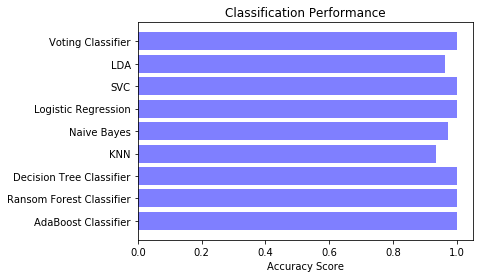

In [110]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

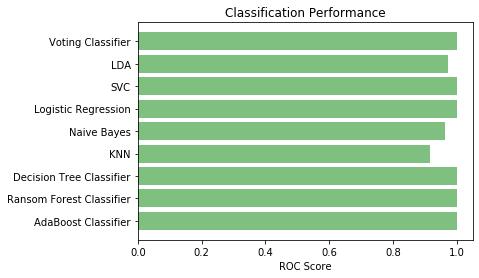

In [111]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

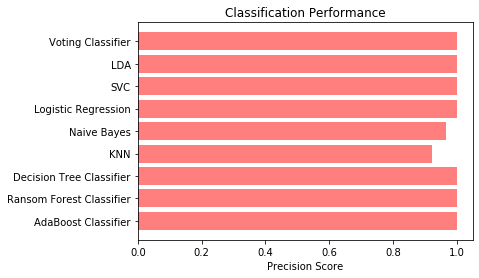

In [112]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

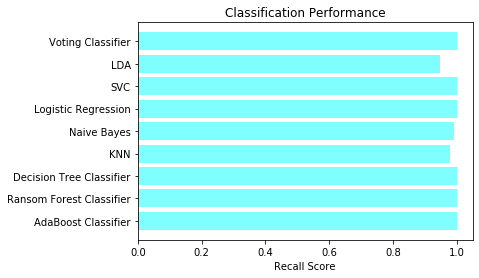

In [113]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

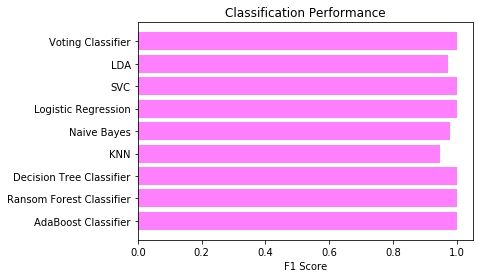

In [114]:
plt2.barh(y_pos, f1_scorea, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

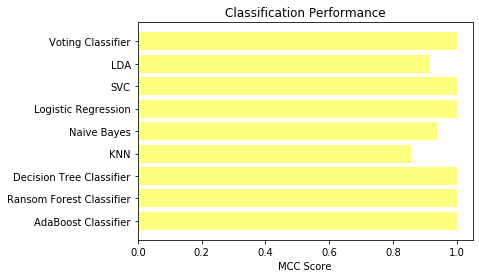

In [115]:
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

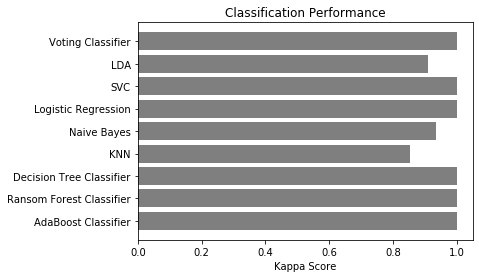

In [116]:
plt2.barh(y_pos, kappa, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

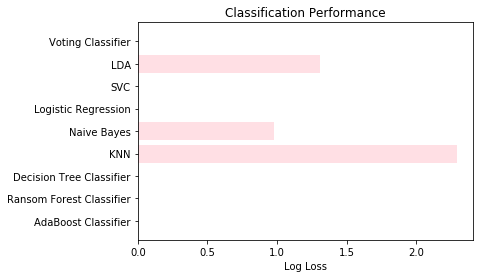

In [117]:
plt2.barh(y_pos, loga, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# PT

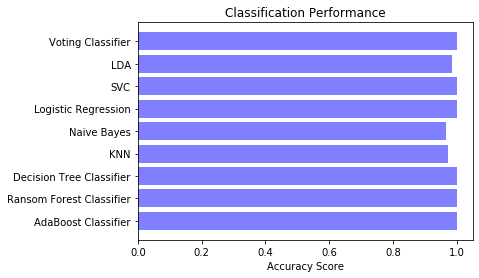

In [118]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

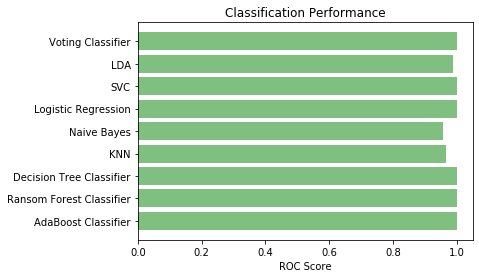

In [119]:
plt2.barh(y_pos, roc1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

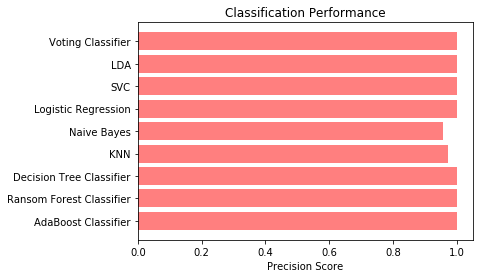

In [120]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

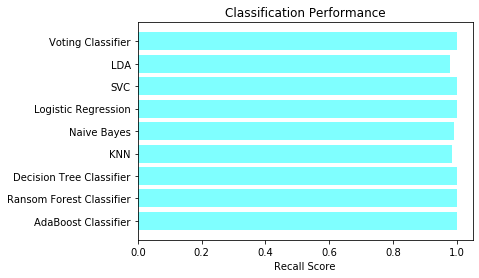

In [121]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

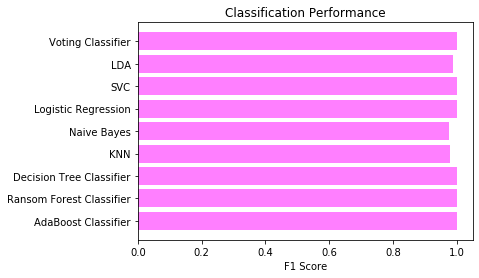

In [122]:
plt2.barh(y_pos, f1_score1, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

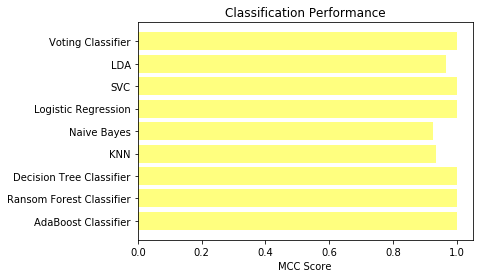

In [123]:
plt2.barh(y_pos, mcc1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

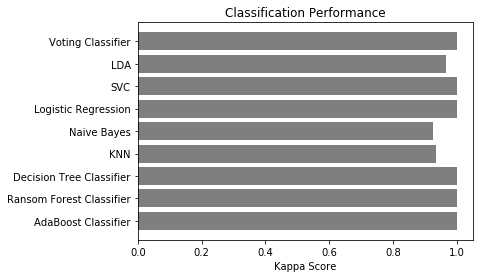

In [124]:
plt2.barh(y_pos, kappa1, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

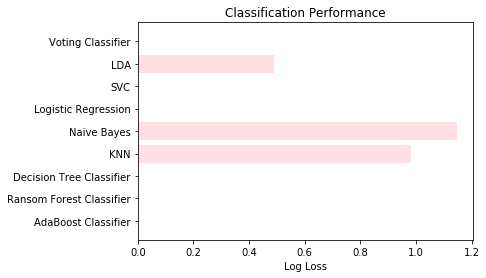

In [125]:
plt2.barh(y_pos, log1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# MAS 

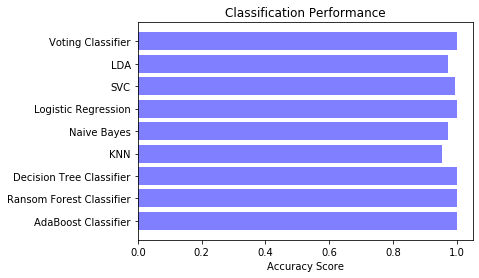

In [126]:
plt2.barh(y_pos, accuracy2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

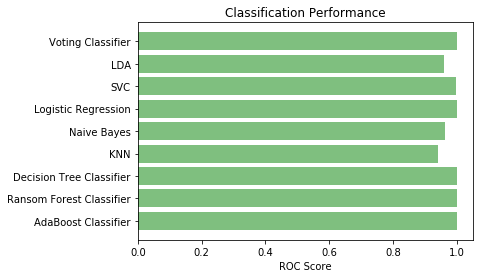

In [127]:
plt2.barh(y_pos, roc2, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

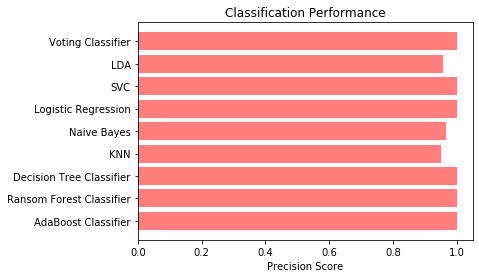

In [128]:
plt2.barh(y_pos, precision2, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

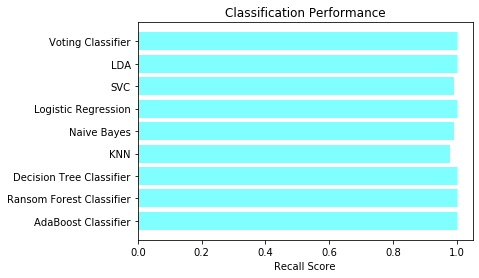

In [129]:
plt2.barh(y_pos, recall2, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

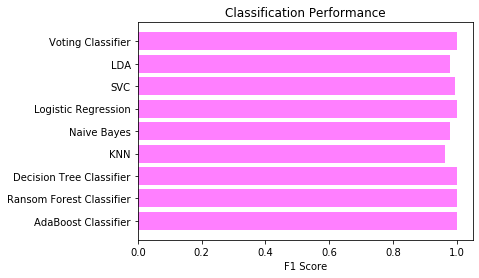

In [130]:
plt2.barh(y_pos, f1_score2, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

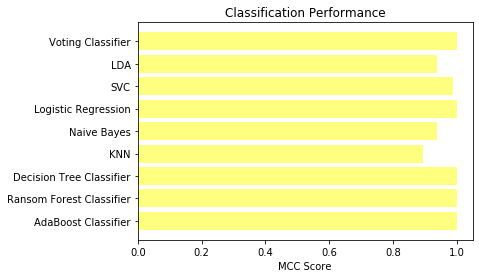

In [131]:
plt2.barh(y_pos, mcc2, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

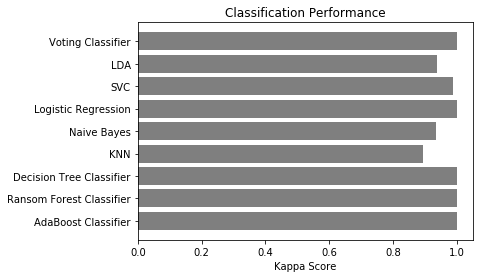

In [132]:
plt2.barh(y_pos, kappa2, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

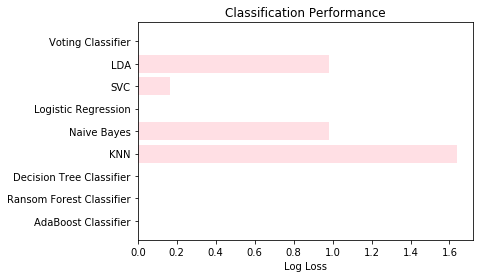

In [133]:
plt2.barh(y_pos, log2, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()

# Normalizer

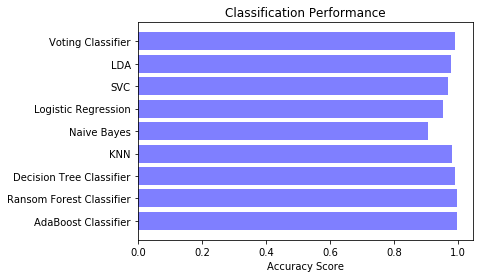

In [134]:
plt2.barh(y_pos, accuracy3, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

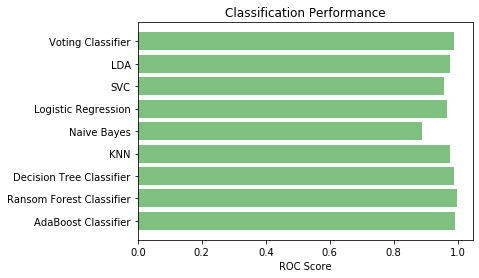

In [135]:
plt2.barh(y_pos, roc3, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()

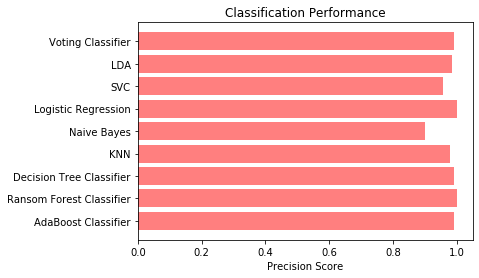

In [136]:
plt2.barh(y_pos, precision3, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

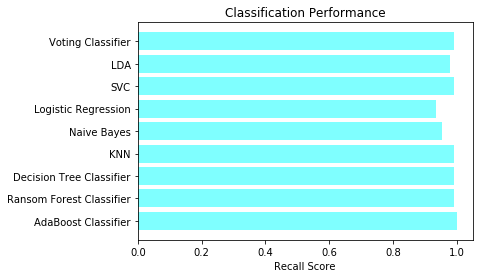

In [137]:
plt2.barh(y_pos, recall3, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

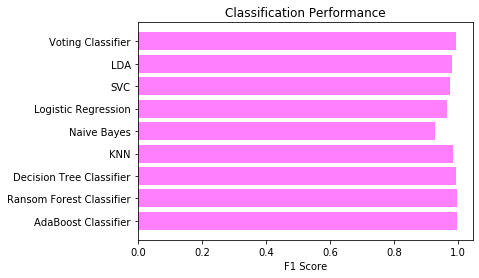

In [138]:
plt2.barh(y_pos, f1_score3, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

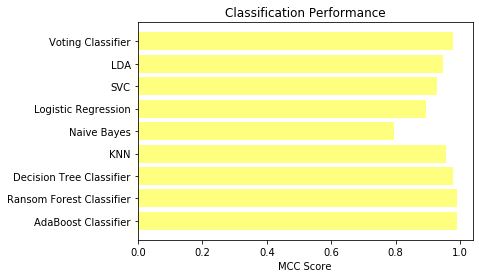

In [139]:
plt2.barh(y_pos, mcc3, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC Score')
plt2.title('Classification Performance')
plt2.show()

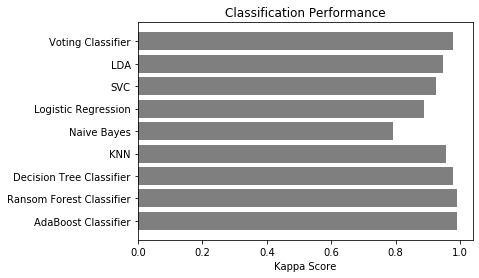

In [140]:
plt2.barh(y_pos, kappa3, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

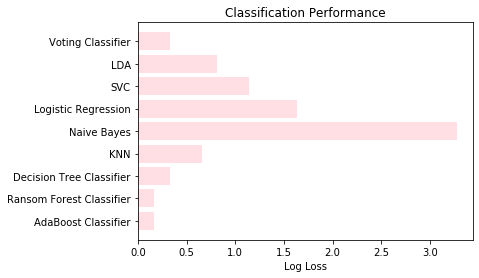

In [141]:
plt2.barh(y_pos, log3, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Log Loss')
plt2.title('Classification Performance')
plt2.show()